<a href="https://colab.research.google.com/github/kyungmo90/Ubion-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2023.01.05
#머신러닝

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#train과 test를 나눠줌
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ashopping.csv", encoding = "cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [ ]:
#필요열(변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "1회 평균매출액", "할인권 사용 횟수"]]
Y = df["평균 구매주기"]

#e데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#model 만들기
model = KNeighborsRegressor()

#교차검증
score = cross_val_score(model, X_train, Y_train, cv=5)
print("교차검증 점수:", score)

교차검증 점수: [0.65777511 0.71775927 0.61704877 0.64648606 0.77413476]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#필요열(변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df["이탈여부"]

#e데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#모형생성
model = KNeighborsClassifier()

#검증(StratifiedKFold Cross-Validation test)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0)
scores =  cross_val_score(model, X_train, Y_train, cv = skf)
print("교차검증 점수:", scores)

교차검증 점수: [0.64285714 0.7        0.67857143 0.67142857 0.70714286]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import GridSearchCV

#필요열(변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df["이탈여부"]

#e데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#모형생성
model = KNeighborsClassifier()

#그리드 인자 검색
mylist = list(range(1, 50))
k_list = [x for x in mylist if x %2 !=0]
parameter_grid = {"n_neighbors" : k_list}

#그리드 서치
#모든 경우의 수에 대해 모델을 만들고 성능을 평가해 그 중 모델 성능을 가장 높게 만드는 파라미터 값을 찾아준다.
grid_search = GridSearchCV(model, parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'n_neighbors': 9}

In [ ]:
grid_search = GridSearchCV(model, parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

grid_search.best_params_ #최적의 파라미터 찾기
grid_search.cv_results_

{'mean_fit_time': array([0.00201344, 0.00223866, 0.00194478, 0.00207014, 0.00217063,
        0.00195942, 0.00233459, 0.00199528, 0.00218704, 0.00210855,
        0.00202806, 0.00194361, 0.00229285, 0.00223336, 0.00206082,
        0.00202844, 0.00218077, 0.0028157 , 0.00234146, 0.00232942,
        0.0021035 , 0.00217235, 0.0021435 , 0.00196559, 0.00195463]),
 'std_fit_time': array([1.94321761e-04, 5.01963344e-04, 8.54009892e-05, 2.03446411e-04,
        3.62766260e-04, 6.01274640e-05, 5.53896627e-04, 2.00151192e-04,
        6.80858732e-04, 4.97393471e-04, 3.19772293e-04, 5.88368991e-05,
        4.66175385e-04, 3.13211245e-04, 5.75943543e-05, 3.97223456e-05,
        2.06550804e-04, 7.67635944e-04, 2.07978604e-04, 3.39441079e-04,
        4.69004010e-05, 2.80637673e-04, 2.37442360e-04, 3.04659485e-05,
        2.59331145e-05]),
 'mean_score_time': array([0.0034795 , 0.00404232, 0.00349407, 0.00364697, 0.00388141,
        0.0036159 , 0.00437233, 0.00363743, 0.00369616, 0.00379541,
        0.00

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.metrics import accuracy_score
be = grid_search.best_estimator_
pred = be.predict(X_test) #Y_test 예측값 구하기
accuracy_score(Y_test, pred) #Y실제값

0.6433333333333333

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

#데이터 지정(변수)
X= df.drop(["고객ID", "이탈여부"], axis = 1)
Y = df["이탈여부"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#일변량 통계기반 변수 선택
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,Chi2,p-value,support,attribute
0,11.220487,8.525018e-04,True,총매출액
1,21.391230,4.462997e-06,True,구매금액대
2,40.530259,3.508018e-10,True,방문빈도
3,31.867994,2.401115e-08,True,1회 평균매출액
8,6.784768,9.389630e-03,True,클레임접수여부
11,12.171897,5.156069e-04,True,성별
13,60.680197,2.435210e-14,True,거래기간
14,86.354376,1.882930e-19,True,할인민감여부
16,6.449529,1.131399e-02,True,Frequency
18,40.217271,4.081567e-10,True,평균 구매주기


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

#데이터 지정(변수)
X= df.drop(["고객ID", "이탈여부"], axis = 1)
Y = df["이탈여부"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#일변량 통계기반 변수 선택
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == False]

,Chi2,p-value,support,attribute
4,0.339952,0.560045,False,할인권 사용 횟수
5,0.031862,0.858383,False,총 할인 금액
6,0.263437,0.607931,False,고객등급
7,3.348167,0.067706,False,구매유형
9,3.048056,0.081274,False,구매카테고리수
10,0.005292,0.942031,False,거주지역
12,0.023422,0.878408,False,고객 나이대
15,0.000002,0.998788,False,Recency
17,0.124388,0.724430,False,Monetary


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#일변량 통계기반 변수 선택
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0), threshold="median")
#n_estimators: 트리 갯수, random_state: 시작점,  threshold: 기준점
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] == True]

,attribute,support
0,총매출액,True
2,방문빈도,True
3,1회 평균매출액,True
4,할인권 사용 횟수,True
5,총 할인 금액,True
10,거주지역,True
12,고객 나이대,True
13,거래기간,True
14,할인민감여부,True
18,평균 구매주기,True


#데이터 밸런싱
오버샘플링, 언더샘플링

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [ ]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_under))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
under train data Counter({0: 219, 1: 219})


In [ ]:
#오버 샘플링
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_over))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
under train data Counter({1: 481, 0: 481})


# 선형 회귀분석

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df["평균 구매주기"].describe()

count    1000.000000
mean      266.880824
std       254.077398
min        13.980645
25%       111.957671
50%       191.469697
75%       324.386218
max      1956.000000
Name: 평균 구매주기, dtype: float64

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


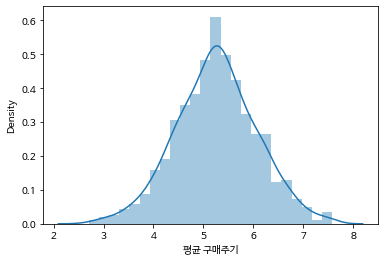

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic")

df["평균 구매주기"] = np.log1p(df["평균 구매주기"])

sns.distplot(df["평균 구매주기"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num=['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '구매카테고리수', 'Frequency', 'Monetary']
cg = ['구매금액대', '고객등급', '구매유형', '클레임접수여부', '거주지역', '성별', '고객 나이대']

X = df[df.이탈여부 == 0][num+cg] #독립변수
Y = df[df.이탈여부 == 0]["평균 구매주기"] #종속변수

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.42215576 -0.59782402  0.72324173  0.52150413  1.67181667 -0.24075719
  0.52402175  1.          0.          0.          1.          0.
  0.          0.          1.          0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.        ]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("train R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

predict value
 [6.0302701  5.41215677 5.42420867 6.43899079 4.93590919 5.85532849
 4.56394358 3.8038955  5.22290102 5.61752221 5.66755858 3.44015256
 4.32828323 5.41149193 5.83496713 5.04649847 5.12441095 5.61717937
 5.28594149 5.43582927 5.45116422 5.26304722 5.70801146 5.03246422
 4.70523751 5.39010832 5.59724863 4.08965942 4.40771408 5.45203619
 5.39920771 5.65530022 5.27711883 5.7898368  5.34802942 5.55984513
 5.18690689 5.57605304 5.47013415 6.61038086 5.42457581 4.43007687
 4.68874494 4.29082123 4.77392453 5.94844185 4.93573451 5.44179832
 5.29885396 5.79849569 5.44895057 6.13893195 4.70853914 4.72136082
 5.26288015 5.29559649 4.9944117  5.70877743 4.22588554 5.06871067
 5.13133955 4.83694564 4.444105   5.55643915 4.70940657 5.48285624
 5.44463304 4.79091017 5.55952311 3.24002924 5.61109691 5.0678168
 5.25923693 4.69626943 3.98374392 5.84571399 5.66972277 5.3203395
 4.21100319 4.96752541 4.81038608 5.46601131 5.26382683 4.61218179
 5.48213481 5.17219235 4.98828846 5.52966787 4.19

In [ ]:
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 5.204
가중치(beta) [-0.156  0.388 -0.019 -0.01   0.035 -0.29   0.015  0.292 -0.001 -0.29
  0.014 -0.014  0.055  0.036  0.008 -0.099 -0.08   0.08   0.427 -0.082
 -0.06  -0.194 -0.021 -0.078  0.008 -0.055  0.055 -0.427  0.01   0.07
  0.043  0.048  0.257]


In [ ]:
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()
Y_test_df = pd.DataFrame(Y_test_df["평균 구매주기"])
Y_test_df

,평균 구매주기
0,6.049733
1,5.059239
2,4.743482
3,6.316036
4,4.815228
...,...
205,4.367499
206,5.184402
207,5.796311
208,5.580201


In [ ]:
Y_pred_df = pd.DataFrame(Y_pred)
Y_pred_df

,0
0,6.030270
1,5.412157
2,5.424209
3,6.438991
4,4.935909
...,...
205,4.601291
206,5.207258
207,5.777855
208,5.554846


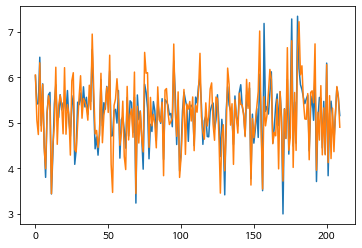

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(Y_pred_df)
plt.plot(Y_test_df)

#2023년 1월 9일
#릿지, 라쏘 회귀

In [ ]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)
print("예측값(Y Predict value) \n", Y_pred)

예측값(Y Predict value) 
 [6.03000797 5.41671746 5.42932123 6.44127922 4.93860553 5.85932374
 4.56839084 3.81054588 5.22477967 5.61889847 5.66813628 3.42981349
 4.33248596 5.41101642 5.83804147 5.04471767 5.1211324  5.61206657
 5.28801914 5.32488795 5.45169079 5.25880606 5.71346032 5.02859175
 4.70951147 5.38878901 5.60027856 4.09721037 4.40744067 5.45098959
 5.39702921 5.64784758 5.27252093 5.79008128 5.35467632 5.56063965
 5.19607603 5.57536879 5.46592343 6.61557262 5.42387534 4.43825559
 4.69193156 4.30121093 4.7731486  5.950302   4.94125475 5.44030949
 5.2948706  5.79698793 5.44723488 6.13538058 4.70865764 4.72464693
 5.25715635 5.29808444 4.9962477  5.70904828 4.24165264 5.06579461
 5.1252699  4.83996783 4.44518243 5.55905844 4.70841625 5.47720406
 5.44152413 4.79120395 5.56974829 3.25280314 5.6106784  5.06803014
 5.25956393 4.70791967 3.98838094 5.84965084 5.67331254 5.31944294
 4.21646513 4.98002289 4.81229781 5.46333154 5.27177929 4.610552
 5.48261262 5.17186083 4.9841382  5.52892

In [ ]:
rmse = sqrt (mean_squared_error(Y_test, Y_pred))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
print("RMSE : {:.3f}". format(rmse))
#비교
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))

ridge R2 : 0.726
RMSE : 0.403
lr R2 : 0.726


In [ ]:
#라쏘
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
Y_pred = lr_lasso.predict(X_test)

print("예측값(Y predidct value) \n", Y_pred)

예측값(Y predidct value) 
 [5.85999035 5.43036643 5.44663007 6.48906612 4.97641413 5.69822258
 4.5716117  3.88906492 5.27984535 5.54858587 5.67709958 3.30742434
 4.45272397 5.42149034 5.87903236 5.00187799 5.12055037 5.56949787
 5.33279402 5.0264179  5.52733519 5.1867408  5.665303   5.0119166
 4.70132881 5.44864394 5.62488274 4.16327321 4.38211259 5.4308754
 5.37511549 5.67040693 5.19104603 5.79672221 5.47877539 5.4547485
 5.25369206 5.54714363 5.42273349 6.6026743  5.44052754 4.61359453
 4.74827815 4.47000201 4.78926599 5.82570411 4.93589832 5.42347938
 5.19064772 5.71009563 5.38598782 5.87895508 4.47556196 4.77561637
 5.23514088 5.36821002 4.94726191 5.74052715 4.48801399 4.99109917
 4.96578984 4.92437103 4.49896869 5.51596171 4.70911385 5.37807152
 5.38059893 4.70777152 5.63186935 3.33411699 5.63024419 5.02637709
 5.23878352 4.85617924 4.07737633 5.82495727 5.67069263 5.22957699
 4.31245514 5.15236296 4.79517679 5.3733623  5.32829571 4.50502391
 5.54652945 5.21846617 5.01779632 5.53962

In [ ]:
rmse = sqrt (mean_squared_error(Y_test, Y_pred))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}". format(rmse))
#비교
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("ridge R2 : {:3f}".format(lr_ridge.score(X_train, Y_train)))

# rmse가 점점 떨어진다(예측력이 좋아졌다.)
# 릿지가 라쏘보다 성능이 좀 더 떨어지는데 큰 데이터는 라쏘가 더 나음.

lasso R2 : 0.709
RMSE : 0.391
lr R2 : 0.726
ridge R2 : 0.725624


In [ ]:
#엘라스틱넷
from sklearn.linear_model import ElasticNet

lr_ela = ElasticNet(alpha = 0.01).fit(X_train, Y_train)
Y_pred = lr_ela.predict(X_test)

print("예측값(Y predict value) \n", Y_pred)

예측값(Y predict value) 
 [5.9405265  5.43949734 5.45645319 6.46077287 4.95641647 5.75737516
 4.58077628 3.8664991  5.2544911  5.56797779 5.69465169 3.35014751
 4.41740921 5.41472514 5.87198794 5.01984866 5.1079496  5.56938294
 5.33424602 5.01150019 5.50236848 5.21289944 5.70405138 5.00509779
 4.73712733 5.43318095 5.63394533 4.16143035 4.40905906 5.45448006
 5.38029119 5.65239382 5.22517748 5.78702872 5.43971899 5.50091954
 5.24686551 5.54584606 5.45012419 6.63427603 5.44729928 4.5642916
 4.7153638  4.40426435 4.79804451 5.87250388 4.95774286 5.42138422
 5.21745366 5.74415372 5.42050245 5.98513427 4.55881782 4.75746308
 5.24959713 5.33108418 4.9783863  5.741972   4.39245511 5.01488932
 5.01745308 4.88230883 4.47336366 5.52395419 4.69688542 5.41272695
 5.3969981  4.7412395  5.62539593 3.29112611 5.63602937 5.02901435
 5.25500609 4.80177521 4.03300414 5.85055833 5.6889433  5.2796506
 4.26043501 5.08768705 4.80884726 5.39430314 5.33776004 4.52387454
 5.51513909 5.19015221 4.99602694 5.54968

In [ ]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("ela R2 : {:3f}".format(lr_ela.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))
#비교
print("lr R2:{:.3f}".format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))

ela R2 : 0.716565
RMSE : 0.394
lr R2:0.726
ridge R2 : 0.726
lasso R2 : 0.709


# 로지스틱 회귀

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,5.260784
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,0.812845
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,2.706759
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,4.727013
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,5.259938
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,5.785012
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,7.579168


In [ ]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df["이탈여부"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

#scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

#oversampling
smote = SMOTE(random_state=0)
X_train_over, Y_train_over = smote.fit_resample(X_train, Y_train)

[[ 0.69336175  0.22690456  0.03475125]
 [-0.225208   -0.02778804 -0.17540748]
 [-0.52055725  0.61729402  0.98046554]
 ...
 [-0.60960507  0.55779616 -0.01778844]
 [-0.02842033 -0.64468689 -0.22794717]
 [-0.30394592  0.83127755 -0.70080431]]


In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C = 1, random_state = 0)
#C는 통상적으로 1을 넣는다.

logit.fit(X_train_over, Y_train_over)
Y_pred = logit.predict(X_test)

#_pred
print("R2 : {:.3f}".format(logit.score(X_train_over, Y_train_over)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_)

R2 : 0.710
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       219
           1       0.47      0.81      0.60        81

    accuracy                           0.70       300
   macro avg       0.69      0.74      0.68       300
weighted avg       0.79      0.70      0.72       300

[-0.10121145]
[[-0.10720418 -0.58431042 -0.47899592]]


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
X = df[["방문빈도", "총 할인 금액", "거래기간", "할인민감여부"]]
Y = df["구매금액대"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#Column transformer
ct = ColumnTransformer([("scaling", StandardScaler(), ["방문빈도", "총 할인 금액", "거래기간"]), ("Onehot", OneHotEncoder(sparse=False), ["할인민감여부"])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#model
multilogit = LogisticRegression(random_state=0, C=0.1, solver='newton-cg', multi_class="multinomial")
multilogit.fit(X_train, Y_train)
Y_pred = multilogit.predict(X_test)

#성능
print("r2:{:3f}".format(multilogit.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

r2:0.605714
              precision    recall  f1-score   support

           0       0.61      0.89      0.72       154
           1       0.40      0.12      0.19        82
           2       0.71      0.55      0.62        64

    accuracy                           0.61       300
   macro avg       0.57      0.52      0.51       300
weighted avg       0.57      0.61      0.55       300



# K-NN(K-최근접 이웃)

In [ ]:
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,5.011544
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,4.410883
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,7.505492
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,6.001690
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,5.896604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,4.884748
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,6.648553
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,5.875579
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,4.938321


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
#classification

X = df[["총매출액", "1회 평균매출액", "방문빈도", "거래기간", "평균 구매주기"]]
Y = df["이탈여부"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

X_train, Y_train = SMOTE(random_state=0).fit_resample(X_train, Y_train)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")

knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("Accuracy: {:.3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_pred, Y_test))

Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       183
           1       0.81      0.56      0.67       117

    accuracy                           0.78       300
   macro avg       0.79      0.74      0.75       300
weighted avg       0.79      0.78      0.77       300



In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
#numeric value(Y)
import numpy as np

X = df[df.이탈여부 ==0][["총매출액","1회 평균매출액","총 할인 금액","구매카테고리수","Frequency"]]
Y = df[df.이탈여부 ==0]["평균 구매주기"]
Y = np.log1p(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=9, p=2)
# 1은 메하탄 2는 뉴클리어데이타 


knn_reg.fit(X_train, Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:3f}".format(rmse))
# accuracy: 0.759 이 값은 트레이닝에 값이다 r2
# RMSE: 0.062762 주기의 오차

accuracy: 0.759
RMSE: 0.062762


# 의사결정나무(Decision Tee)

In [ ]:
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,5.011544
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,4.410883
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,7.505492
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,6.001690
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,5.896604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,4.884748
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,6.648553
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,5.875579
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,4.938321


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,5.260784
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,0.812845
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,2.706759
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,4.727013
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,5.259938
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,5.785012
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,7.579168


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
X = df[["총매출액","구매금액대","할인권 사용 횟수","총 할인 금액","구매유형","구매카테고리수","성별","거주지역"]]
Y =  df["이탈여부"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train , Y_train)
Y_pred = DT_model.predict(X_test)
print("accutacy : {:.3f}".format(DT_model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

accutacy : 0.607
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       219
           1       0.28      0.28      0.28        81

    accuracy                           0.61       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.61      0.61      0.61       300



In [ ]:
feature_name = X.columns

feature_importance = DT_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True)

# 여러가지 인사이트를 얻는 데 효과적임임

[(0.7493404125777997, '총매출액'),
 (0.1630541216629677, '거주지역'),
 (0.08760546575923255, '구매카테고리수'),
 (0.0, '할인권 사용 횟수'),
 (0.0, '총 할인 금액'),
 (0.0, '성별'),
 (0.0, '구매유형'),
 (0.0, '구매금액대')]

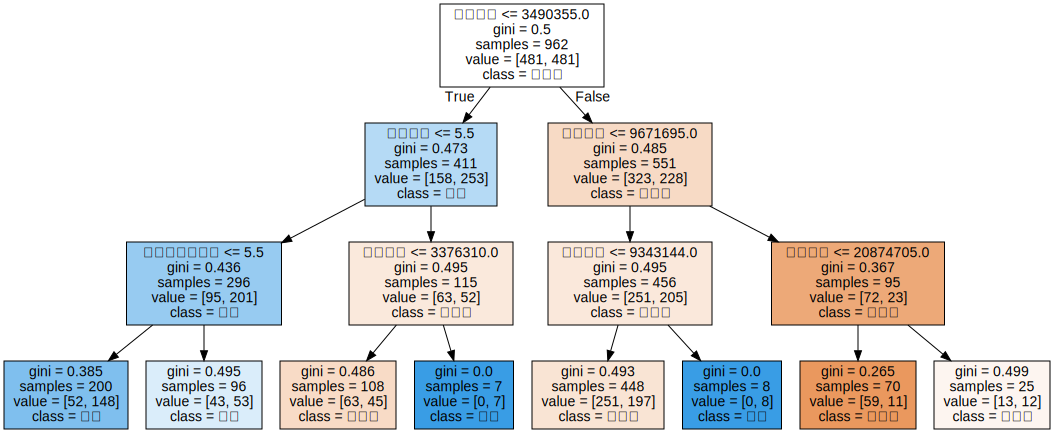

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model, out_file="tree.dot", class_names=["비이탈", "이탈"], feature_names=feature_name, impurity=True, filled=True)

#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
#numeric value(Y)

X = df[df.이탈여부 ==0][["총매출액","구매금액대","할인권 사용 횟수","총 할인 금액","구매유형","구매카테고리수","성별","거주지역"]]
Y =  df[df.이탈여부 ==0]["평균 구매주기"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state = 0, max_depth = 5)
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))

accuracy : 0.558
rmse : 0.625


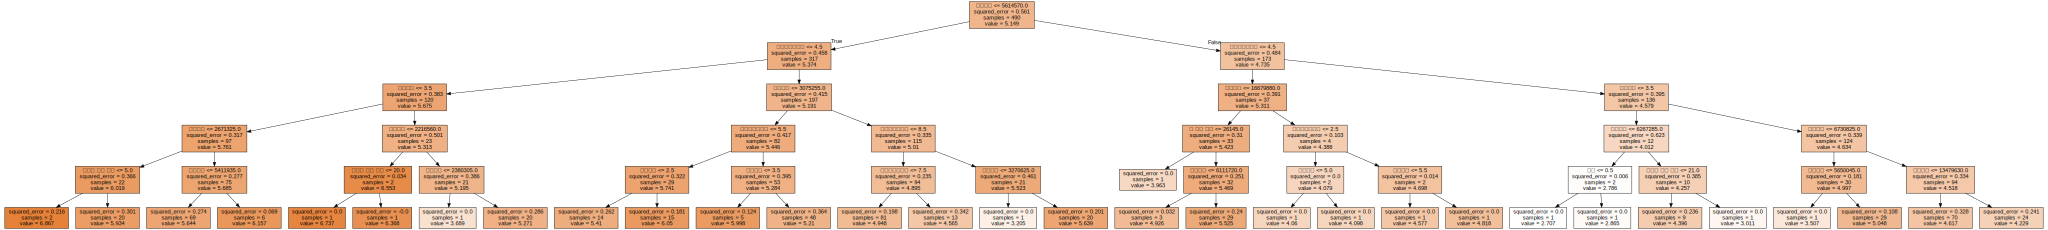

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model_reg, out_file="tree.dot", class_names=["비이탈", "이탈"], feature_names=feature_name, impurity=True, filled=True)

#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#SVM : Support Vector Machine

In [ ]:
X = df[['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액', '구매유형', '구매카테고리수','성별', '거주지역']]
Y = df['이탈여부']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.svm import SVC

SVC_model = SVC(C=1000, gamma=10, random_state=0)
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
print("accuracy: {:.3f}".format(SVC_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy: 1.000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.27      1.00      0.43        81

    accuracy                           0.27       300
   macro avg       0.14      0.50      0.21       300
weighted avg       0.07      0.27      0.11       300



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X = df[[ '구매금액대', '할인권 사용 횟수']]
Y = np.log1p(df['총매출액'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.svm import SVR

SVR_model = SVR(C=1, kernel = "linear", epsilon=0.1)
SVR_model.fit(X_train, Y_train)
Y_pred = SVR_model.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))
print(SVR_model.coef_)

NameError: ignored

In [ ]:
X = df[["총매출액","구매금액대","할인권 사용 횟수","총 할인 금액","구매유형","구매카테고리수","성별","거주지역"]]
Y = df["이탈여부"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.svm import SVC

SVC_model = SVC(C=1, gamma=0.1, random_state=0) #c랑 gamma는 중요
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
print("accutacy : {:.3f}".format(SVC_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))
rmsm = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

accutacy : 1.000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.27      1.00      0.43        81

    accuracy                           0.27       300
   macro avg       0.14      0.50      0.21       300
weighted avg       0.07      0.27      0.11       300

RMSE : 0.625


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 나이브 베이즈(Naive)

In [ ]:
X = df[["총매출액","구매금액대","할인권 사용 횟수"]]
Y =  df["할인민감여부"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB(var_smoothing = 0)
NB_model.fit(X_train, Y_train)
Y_pred = NB_model.predict(X_test)
print("accutacy : {:.3f}".format(NB_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accutacy : 0.661
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       177
           1       0.79      0.42      0.55       123

    accuracy                           0.72       300
   macro avg       0.74      0.67      0.67       300
weighted avg       0.73      0.72      0.69       300



In [ ]:
#neumaric value(Y)

X = df[df.이탈여부 ==0][["총매출액","구매금액대","할인권 사용 횟수","총 할인 금액","구매유형","구매카테고리수","성별","거주지역"]]
Y = np.log1p(df[df.이탈여부 ==0]["평균 구매주기"])
# 연속형일때 log1p함수를 씌운다.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

from sklearn.linear_model import BayesianRidge

NB_model_reg = BayesianRidge(alpha_1 = 0.1, lambda_1 = 0.001)
NB_model_reg.fit(X_train, Y_train)
Y_pred = NB_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(NB_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))
print(NB_model_reg.coef_)
#coef은 각각의의 베타값

accuracy : 0.284
rmse : 0.099
[-5.53054580e-09 -2.22195332e-02  5.83786970e-04 -5.13829971e-08
 -5.44367181e-03 -1.72718590e-02  1.04683050e-02  1.78603686e-03]


- CNN : 데이터의 특징을 추출하여 특징들의 패턴을 파악하는 구조(이미지나 영상)
- DNN : 인공신경망 모델 내 은닉층을 많이 늘려 학습의 결과를 향상시킨 방법(은닉층 2개이상)
- RNN : 내부의 순환구조를 이용하여 과거의 학습을 가중치를 통해 현재 학습에 반영(음성이나 문자 앞뒤 분석)
- dataset을 linear regression으로 예측한 후 voting하여 최종 예측 결과
- 앙상블 : 주어진 자료로부터 여러 개의 예측 모델들을 만든 후 예측 모형들을 조합하여
하나의 최종 예측 모형을 만드는 방법
- 배깅 모형에는 랜덤포레스트가 대표적이다.
- 부스팅은 순차적 학습 및 개선( XGBoost, AdaBoost, Gradient Boost 등)
- 군집분석: 비지도 학습으로 데이터 자체에 의존해서 데이터의 구조와 자료를 탐색하고 요약하는 기법

- 자연로그를 적용하는 이유: 정규화를 시키기 위해


모형 성능비교

In [ ]:
X1 = df[["총매출액","구매금액대","할인권 사용 횟수","총 할인 금액","구매유형","구매카테고리수","성별","거주지역"]]
Y1 = df["이탈여부"]
X1

,총매출액,구매금액대,할인권 사용 횟수,총 할인 금액,구매유형,구매카테고리수,성별,거주지역
0,4963160,1,1,5445,3,7,1,6
1,2271520,0,22,350995,1,5,0,4
2,2484250,0,6,186045,2,4,0,6
3,2778850,0,1,5195,4,4,0,5
4,4437610,1,9,246350,4,6,0,6
...,...,...,...,...,...,...,...,...
995,12731560,2,3,44445,3,8,0,6
996,3419010,0,6,186545,2,9,0,6
997,4612100,1,8,260700,1,1,1,4
998,5165360,1,20,347700,3,7,1,5


In [ ]:
X1.columns

Index(['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액', '구매유형', '구매카테고리수', '성별',
       '거주지역'],
      dtype='object')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

#Colum transformer
ct = ColumnTransformer([("scaling", StandardScaler(), ["총매출액", "구매금액대", "할인권 사용 횟수", "총 할인 금액"]),
                        ("onehot", OneHotEncoder(sparse=False), ['구매유형', '구매카테고리수', '성별', '거주지역'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
logit_model = LogisticRegression(C=1, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=9)
dt_model = DecisionTreeClassifier(random_state = 0, max_depth=3)

In [ ]:
logit_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
logit_Y_pred = logit_model.predict(X_test)
knn_Y_pred = knn_model.predict(X_test)
dt_Y_pred = dt_model.predict(X_test)

In [ ]:
print("logit score : {:.3f}".format(logit_model.score(X_train, Y_train)))
print("knn score : {:.3f}".format(knn_model.score(X_train, Y_train)))
print("dt score : {:.3f}".format(dt_model.score(X_train, Y_train)))

logit score : 0.697
knn score : 0.704
dt score : 0.713


In [ ]:
print(classification_report(Y_test, logit_Y_pred))
print(classification_report(Y_test, knn_Y_pred))
print(classification_report(Y_test, dt_Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       219
           1       0.65      0.16      0.26        81

    accuracy                           0.75       300
   macro avg       0.70      0.56      0.55       300
weighted avg       0.73      0.75      0.69       300

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       219
           1       0.32      0.17      0.22        81

    accuracy                           0.68       300
   macro avg       0.53      0.52      0.51       300
weighted avg       0.62      0.68      0.64       300

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       219
           1       0.75      0.04      0.07        81

    accuracy                           0.74       300
   macro avg       0.74      0.52      0.46       300
weighted avg       0.74      0.74      0.64       300



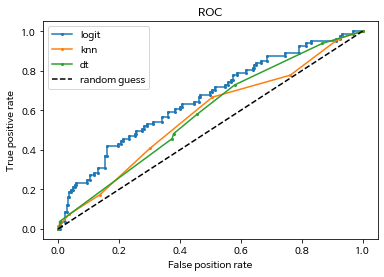

In [ ]:
#plot

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

fpr1, tpr1, threshold = roc_curve(Y_test, logit_model.decision_function(X_test))
fpr2, tpr2, threshold = roc_curve(Y_test, knn_model.predict_proba(X_test)[:,1])
fpr3, tpr3, threshold = roc_curve(Y_test, dt_model.predict_proba(X_test)[:,1])

#ROC
plt.plot(fpr1, tpr1, 'o-', ms=2, label = "logit")
plt.plot(fpr2, tpr2, 'o-', ms=2, label = "knn")
plt.plot(fpr3, tpr3, 'o-', ms=2, label = "dt")
plt.plot([0,1], [0,1], "k--", label = "random guess")

plt.legend()
plt.xlabel("False position rate")
plt.ylabel("True positive rate")
plt.title("ROC")
plt.show()

In [ ]:
logit_model_auc = roc_auc_score(Y_test, logit_model.decision_function(X_test))
knn_model_auc = roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:,1])
dt_model_acu = roc_auc_score(Y_test, dt_model.predict_proba(X_test)[:,1])

In [ ]:
print("logit AUC score:{:.3f}".format(logit_model_auc))
print("knn AUC score:{:.3f}".format(knn_model_auc))
print("dt AUC score:{:.3f}".format(dt_model_acu))

logit AUC score:0.659
knn AUC score:0.572
dt AUC score:0.583
